In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('ggplot')
import seaborn as sns
sns.set_palette('husl')
from collections import Counter

In [2]:
df = pd.read_csv("bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
print(f"The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset consists of 550 rows and 7 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


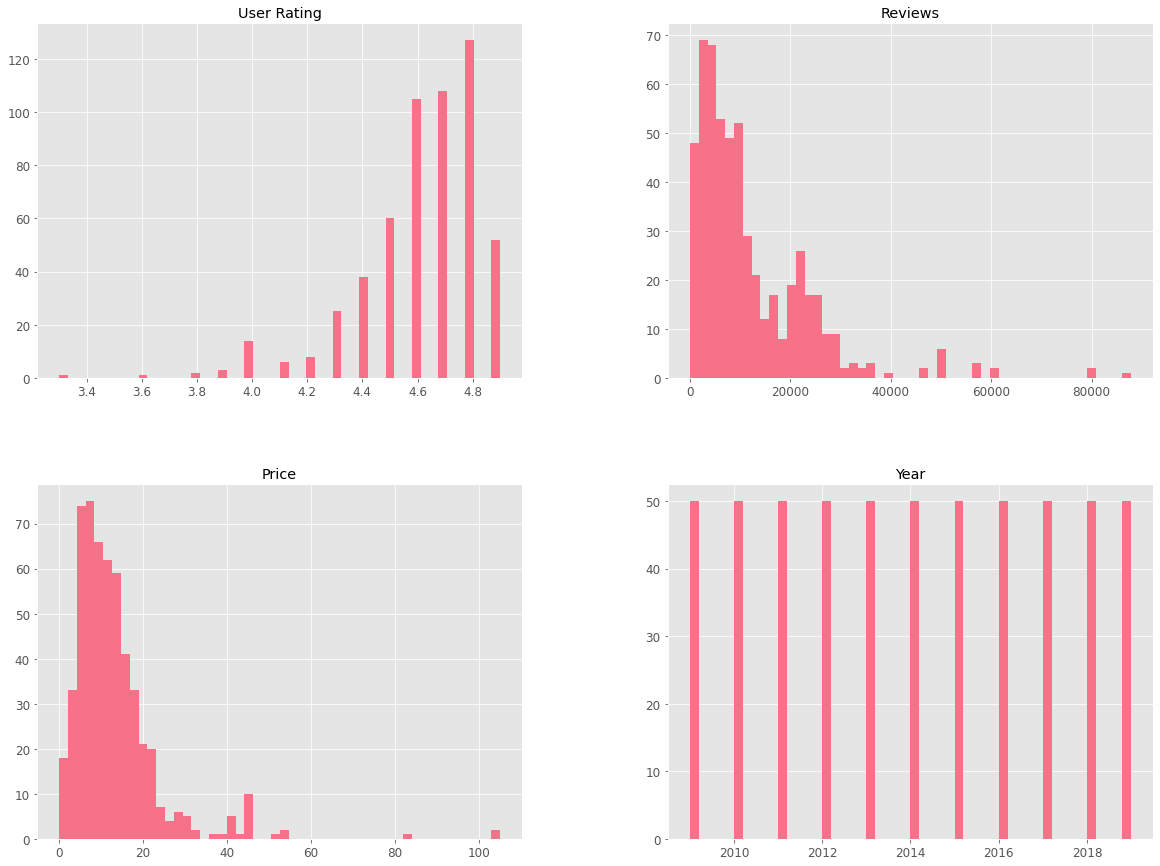

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='User Rating', ylabel='Genre'>

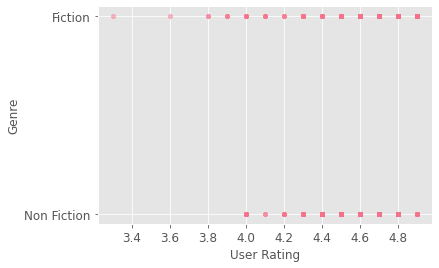

In [7]:
df.plot(kind="scatter", x="User Rating", y="Genre", alpha=0.5)

In [8]:
df["Genre"].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)')

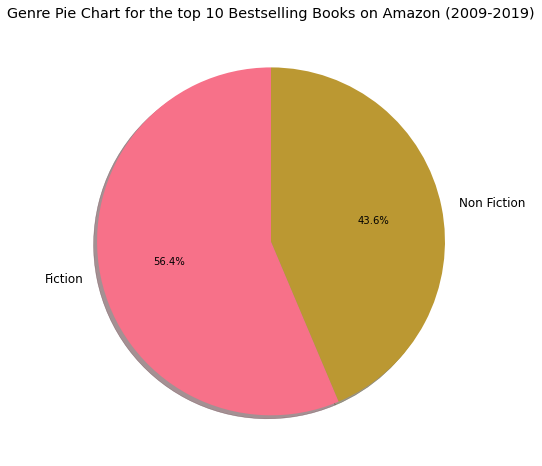

In [9]:
pie = [310, 240]
sns.set_palette("husl")
plt.figure(figsize=(8,8))
plt.pie(pie ,labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=90)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)')

In [10]:
df["Author"].value_counts()

Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
                                      ..
Marty Noble                            1
Paulo Coelho                           1
Delia Owens                            1
Adam Mansbach                          1
Mike Moreno                            1
Name: Author, Length: 248, dtype: int64

In [11]:
new_df = df.drop_duplicates('Name')
new_df[new_df['Author']=='Rick Riordan']

,Name,Author,User Rating,Reviews,Price,Year,Genre
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
343,The Blood of Olympus (The Heroes of Olympus (5)),Rick Riordan,4.8,6600,11,2014,Fiction
406,"The House of Hades (Heroes of Olympus, Book 4)",Rick Riordan,4.8,6982,14,2013,Fiction
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
428,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,14,2010,Fiction
432,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
456,"The Red Pyramid (The Kane Chronicles, Book 1)",Rick Riordan,4.6,2186,12,2010,Fiction
458,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,12,2012,Fiction
463,"The Son of Neptune (Heroes of Olympus, Book 2)",Rick Riordan,4.8,4290,10,2011,Fiction
469,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,10,2011,Fiction


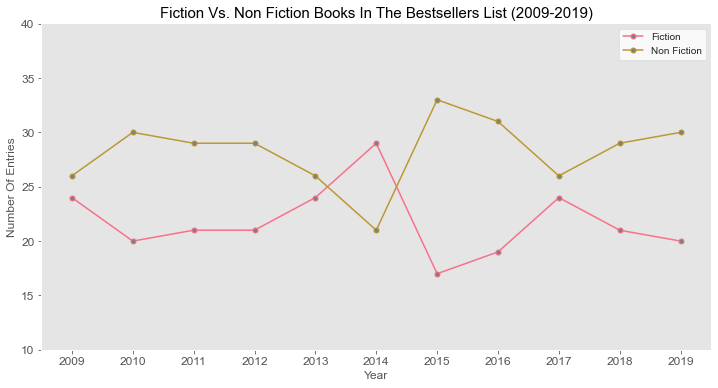

In [12]:
books = df.groupby(['Year','Genre']).count().unstack()['Name']

fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.set_style('white')
axes.plot(books,markersize=5,markerfacecolor='grey',marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Number Of Entries')
axes.set_xticks(books.index)
axes.set_ylim(10,40)
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books In The Bestsellers List (2009-2019)',fontdict={'size':15})
plt.grid(0)

plt.show()

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Reviews', ylabel='Year'>,
        <AxesSubplot:xlabel='Price', ylabel='Year'>,
        <AxesSubplot:xlabel='User Rating', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Reviews'>,
        <AxesSubplot:xlabel='Reviews', ylabel='Reviews'>,
        <AxesSubplot:xlabel='Price', ylabel='Reviews'>,
        <AxesSubplot:xlabel='User Rating', ylabel='Reviews'>],
       [<AxesSubplot:xlabel='Year', ylabel='Price'>,
        <AxesSubplot:xlabel='Reviews', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='User Rating', ylabel='Price'>],
       [<AxesSubplot:xlabel='Year', ylabel='User Rating'>,
        <AxesSubplot:xlabel='Reviews', ylabel='User Rating'>,
        <AxesSubplot:xlabel='Price', ylabel='User Rating'>,
        <AxesSubplot:xlabel='User Rating', ylabel='User Rating'>]],
      dtype=object)

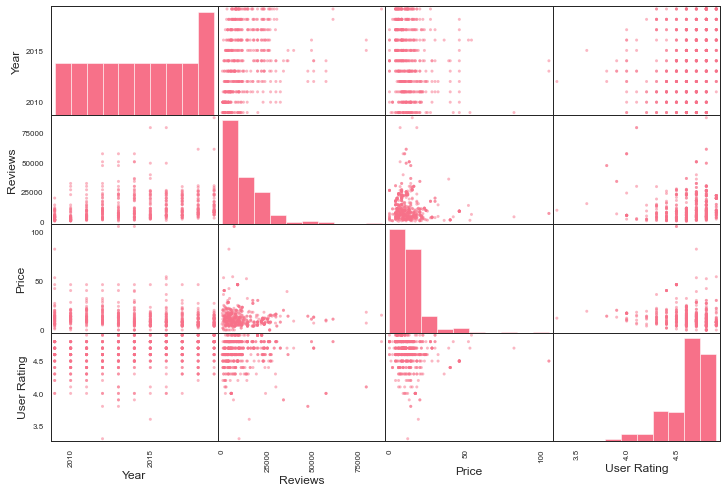

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Year", "Reviews", "Price",
              "User Rating"]
scatter_matrix(df[attributes], figsize=(12, 8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='col1', ylabel='col2'>

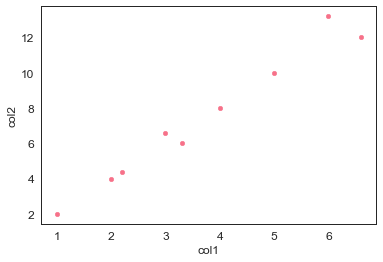

In [14]:
# A positive Correlation would look like this
d = {'col1': [1,2.2,2,3.3,3,4,5,6.6,6], 'col2': [2,4.4,4,6,6.6,8,10,12,13.2]}
df_cor = pd.DataFrame(data=d)
df_cor.plot(kind="scatter", x="col1", y="col2")